Proyecto 2



In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd 
from pandas import read_csv,set_option,Series, to_numeric
from pandas import DataFrame 
from os import chdir
# retroceder al directorio principal
chdir("..")

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import grid
from matplotlib.pyplot import figure
from matplotlib.pyplot import ylabel
from matplotlib.pyplot import xlabel
from matplotlib.pyplot import show, axis , title, subplots
from matplotlib.pyplot import savefig
from matplotlib.pyplot import xticks
from seaborn import pairplot,catplot, lineplot,relplot
import seaborn as sns


# Preprocesado y modelado LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# Preprocesado y modelado LogisticRegression
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Configuración

import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
%matplotlib inline


### Revisión general de los dos conjunto de datos "rrhh parte 1 y parte 2"

In [2]:
# Cargar el dataset "rrhh parte 1 y parte 2"
df_rrhh_1 = read_csv('data/rrhh_Parte1.csv') 
df_rrhh_2 = read_csv('data/rrhh_Parte2.csv')

In [3]:
df_rrhh_1.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [4]:
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [5]:
df_rrhh_2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [6]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Integracción y limpieza</h1>
  <p></p>
</div>

### Objetivo

Integrar datos para su posterior análisis. 

## Primera parte modelo de predicción salarial

#### Contexto de Negocios:

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:


#### Diccionario de datos:
 
  
  | Variable      | Tipo          | Clasificación | Descripción                                               |
|---------------|---------------|----------------|-----------------------------------------------------------|
| Experiencia   | Numérica       | Continuo              | Años de experiencia en el área.                            |
| Posición      | Categórica     | Nominal        | Posición que busca el postulante: Analista, Coordinador, Gerente. |
| Hijos         | Categórica     | Ordinal        | Número de hijos que tiene el postulante.                  |
| Casado        | Categórica     | Nominal        | Estado civil del postulante: 0 (No casado), 1 (Casado).    |
| Educación     | Categórica     | Ordinal        | Grado máximo de estudios concluido: Bachillerato, Licenciatura, Posgrado. |
| Salario       | Numérica       | Continuo        | Cantidad en pesos mexicanos que el postulante solicita como salario. |
|Contratado   | Categórica       | Nominal         | Postulante fue contratado: 0 (No fue Contratado), 1 (Contratado). 


In [7]:
# Generamos una lista de todas las columnas del conjunto de datos
list(df_rrhh_1.columns)

['Experiencia', 'Posicion', 'Hijos', 'Casado', 'Educacion', 'Salario']

In [8]:
# Mostrar dimenciones del df
df_rrhh_1.shape

(1000, 6)

In [9]:
# Mostrar las 5 primeras filas
df_rrhh_1.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [10]:
# Imprime información de todas las columnas
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [11]:
# Tipo de datos detectados por Pandas
df_rrhh_1.dtypes

Experiencia    float64
Posicion        object
Hijos            int64
Casado           int64
Educacion       object
Salario          int64
dtype: object

### Se revisan errores e inconsistencias en los datos

In [12]:
# Mostrar los datos únicos de cada variable 
for column in df_rrhh_1:
    print("-"*80)
    print(column)
    print("Valores únicos: ",df_rrhh_1[column].unique())
    print("-"*80)

--------------------------------------------------------------------------------
Experiencia
Valores únicos:  [ 0.5  5.6 11.7  5.2  7.2  1.3  8.1  6.2  9.8 10.5  6.4  3.7  8.   9.
  1.7 12.2  7.   5.9  1.6  9.7  5.   6.6  9.6  7.8 11.9  6.3  4.5  4.9
  8.4  8.8  9.1  7.5  5.8  9.3  5.5  3.9  6.9  2.2  4.2  9.9  5.4 10.1
  0.9  9.2  8.2  8.5  7.4  6.1  7.7  2.8  3.2  5.3  0.8 11.5  3.   7.1
  2.1  7.6  8.6  6.5 10.9  4.8  4.3 13.  10.2  6.8  5.7  4.4  7.9 10.6
  8.7  3.1  8.3  4.6  6.  10.8  2.4 15.2  2.6  1.4  4.1  3.3  2.   3.5
  0.6  6.7  4.7  1.   7.3  8.9  9.5  1.2 12.9  5.1  3.8 10.4  3.6 13.5
 10.7  9.4 11.3 11.1  2.5  0.7 11.8  2.7  3.4  1.8 10.   4.  12.5 11.4
  0.1 14.4 14.3 11.6  1.9 12.4 12.3 10.3  2.9 14.8  1.1 11.2 14.1 13.7
 12.1]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Posicion
Valores únicos:  ['Analista' 'Coordinador' 'Gerente']
--------------------

### Se revisan las  variables numéricas  `Experiencia` y `Salario` si contiene valores no numéricos

In [13]:
display(df_rrhh_1[df_rrhh_1['Experiencia']=='FALSO']['Experiencia'].count())
df_rrhh_1['Experiencia'] = to_numeric(df_rrhh_1['Experiencia'],errors='coerce')

0

In [14]:
# contar las repeticiones   del valor 'FALSO'
display(df_rrhh_1[df_rrhh_1['Salario']=='FALSO']['Salario'].count())
df_rrhh_1['Salario'] = to_numeric(df_rrhh_1['Salario'],errors='coerce')

0

In [15]:
# Se verifica dato nulos o faltantes
df_rrhh_1.isnull().sum()

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
dtype: int64

In [16]:
# Se determina los valores nulos como porcentaje
df_rrhh_1.isna().sum()/len(df_rrhh_1) *100

Experiencia    0.0
Posicion       0.0
Hijos          0.0
Casado         0.0
Educacion      0.0
Salario        0.0
dtype: float64

In [17]:
#  número de registros duplicados, no hay registros duplicado
df_rrhh_1.duplicated().sum()

0

In [18]:
print(f"porcentaje de completitud: {df_rrhh_1.count().sum() / df_rrhh_1.size * 100:.2f}%")

porcentaje de completitud: 100.00%


<div class="alert alert-info" role="alert">
<ul>
<li>porcentaje de valores faltantes:

- Menos de 1%: Trivial (no relevante)
- 1-5%: Manejable
- 5-15%: Manejable mediante métodos sofisticados
- Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación
         
</div>

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

### Objetivo

Comprender el contenido de los datos y responder las preguntas de negocio planteadas

In [19]:
# Estadisticas variables numericas 
df_rrhh_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiencia,1000.0,6.4162,2.577612,0.1,4.6,6.4,8.1,15.2
Hijos,1000.0,1.4530,1.208823,0.0,0.0,1.0,2.0,4.0
Casado,1000.0,0.5950,0.491138,0.0,0.0,1.0,1.0,1.0
Salario,1000.0,30787.0600,11520.200049,5630.0,22557.5,29470.0,37922.5,83470.0


<div class="alert alert-info" role="alert">
Resumen de la distribución y la variabilidad de las variables en el conjunto de datos:
 
   - No hay valores faltantes para las variables numéricas.
   - También podemos observar que alrededor del 59.5% de las observaciones están casadas.
   - El salario promedio es de aproximadamente 30787.   

### Variable objetivo "Salario"

<function matplotlib.pyplot.show(close=None, block=None)>

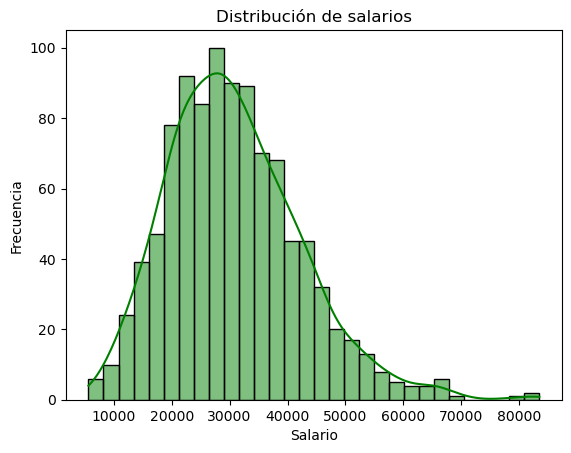

In [20]:
# Distribución de la variable objetivo
sns.histplot(data=df_rrhh_1, x='Salario', bins=30, kde=True, color='green')

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable objetivo Salario:
 
   - Se observa que hay valores extremos en lada derecho de la cola, se utilizo el bins 50 para representar claramente la distribución.
  

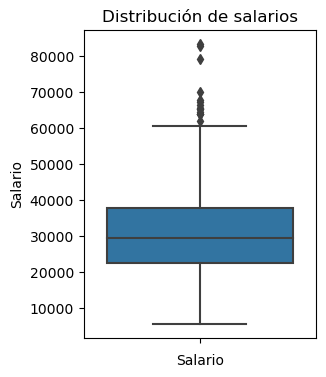

In [21]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df_rrhh_1["Salario"])

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Salario')
plt.show()

<div class="alert alert-info" role="alert">
Box Plots para comprender las distribuciones del Salario:
 
   - Este gráfico indica la presencia de valores extremos más claramente que el histograma. Esto se puede atribuir a la disparidad de salarios en los postulantes. Parte de esto puede ser impulsado por el hecho de que estamos viendo personas con diferentes niveles de educación. 

Text(0.5, 1.0, 'Educacion por salario')

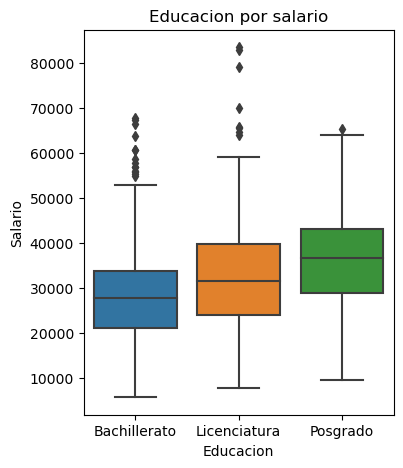

In [22]:
# Relación con las variables categóricas y la variable objetivo salario
data = pd.concat([df_rrhh_1['Salario'], df_rrhh_1['Educacion']], axis=1)
f, ax = plt.subplots(figsize=(4, 5))
fig = sns.boxplot(x='Educacion', y="Salario", data=data)

plt.title('Educacion por salario')

<div class="alert alert-info" role="alert">
Box Plots para comprender la distribución del Salario por educación:
 
   - Podemos ver que no hay diferencias sustanciales entre los salario medios de los distintos niveles de educación. Pero los postulantes con licenciatura tienen salarios muy altos, que paresen ser los valores atípicos.

<function matplotlib.pyplot.show(close=None, block=None)>

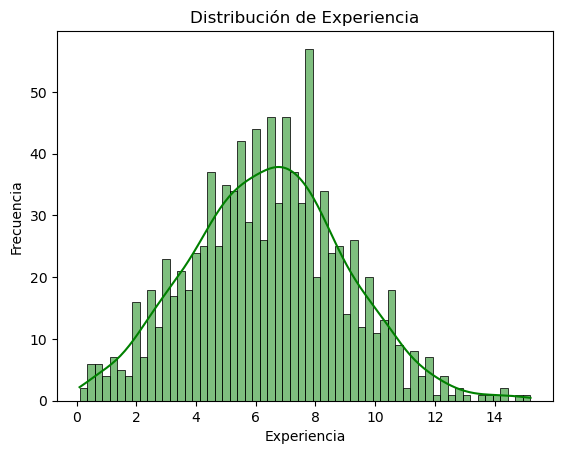

In [23]:
sns.histplot(data=df_rrhh_1, x='Experiencia', bins=60, kde=True, color='green')

plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Frecuencia')
plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable experiencia:
 
   - Se observa que hay valores extremos en lada derecho de la cola, se utilizo el bins 60 para representar claramente la distribución.
   - Hay un pico en el rango de experiencia de 4 a 8 años, lo que indica que hay un gran número de postulantes en ese rango de experiencia.
   - La desviación estándar de la experiencia es de alrededor de 2.5 años, lo que indica que la mayoría de los postulantes están dentro de un rango de +/- 2.5 años de la media.

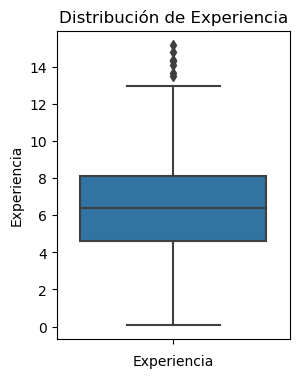

In [24]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df_rrhh_1["Experiencia"])

plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Experiencia')
plt.show()

<div class="alert alert-info" role="alert">
Box Plots para comprender las distribuciones de la experiencia:
 
   - Este gráfico indica la presencia de valores extremos más claramente que el histograma. Esto se puede atribuir a la disparidad de la experiencia en los postulantes. Parte de esto puede ser impulsado por el hecho de que estamos viendo postulantes con distintos niveles de experincia.

Text(0.5, 1.0, 'Experiencia por salario')

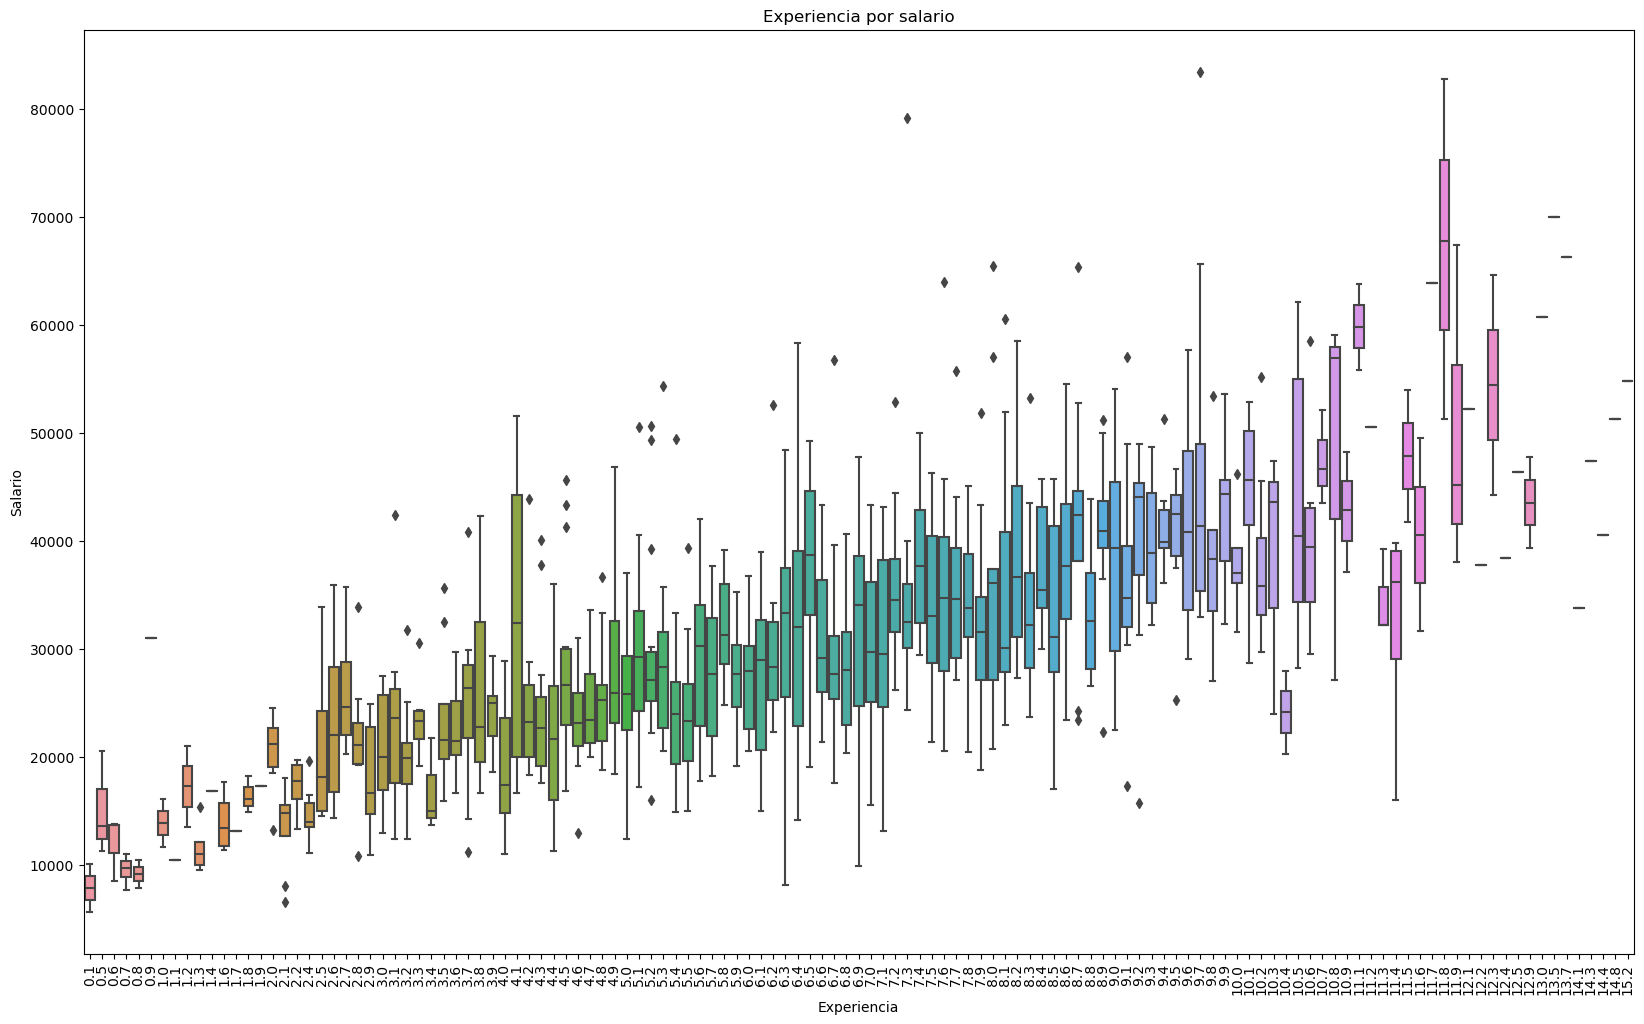

In [25]:
# Relación con las variables experiencia y la variable objetivo salario
data = pd.concat([df_rrhh_1['Salario'], df_rrhh_1['Experiencia']], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x='Experiencia', y="Salario", data=data)
plt.xticks(rotation=90)
plt.title('Experiencia por salario')

<div class="alert alert-info" role="alert">
Box Plots para comprender la distribución del Salario por experiencia:
 
   - Aquí podemos apreciar que existen diferencias significativas entre el salario medio con las distintas experiencia de los postulantes. Los valores atípicos que se aprecian parasen ser de los distintos niveles de educación de los postulantes.

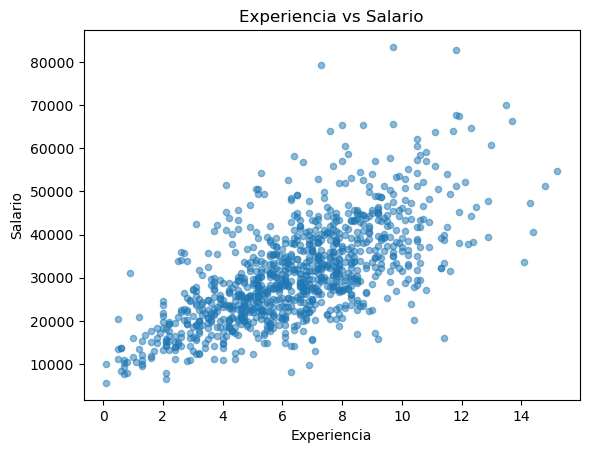

In [26]:
# Gráfica de dispersión, relación Experiencia Vs. Salario
datos = pd.concat([df_rrhh_1['Salario'], df_rrhh_1['Experiencia']], axis=1)
datos.plot.scatter(x='Experiencia', y='Salario', alpha = 0.5,title='Experiencia vs Salario');

<div class="alert alert-info" role="alert">
Gráfica de dispersión, relación Experiencia Vs. Salario:
 
   - Existe un buen patrón lineal positivo entre experiencia y el salario. Esto servirá como punto de partida para análisis más detallado o para validar hipótesis sobre la relación entre estas dos variables.  


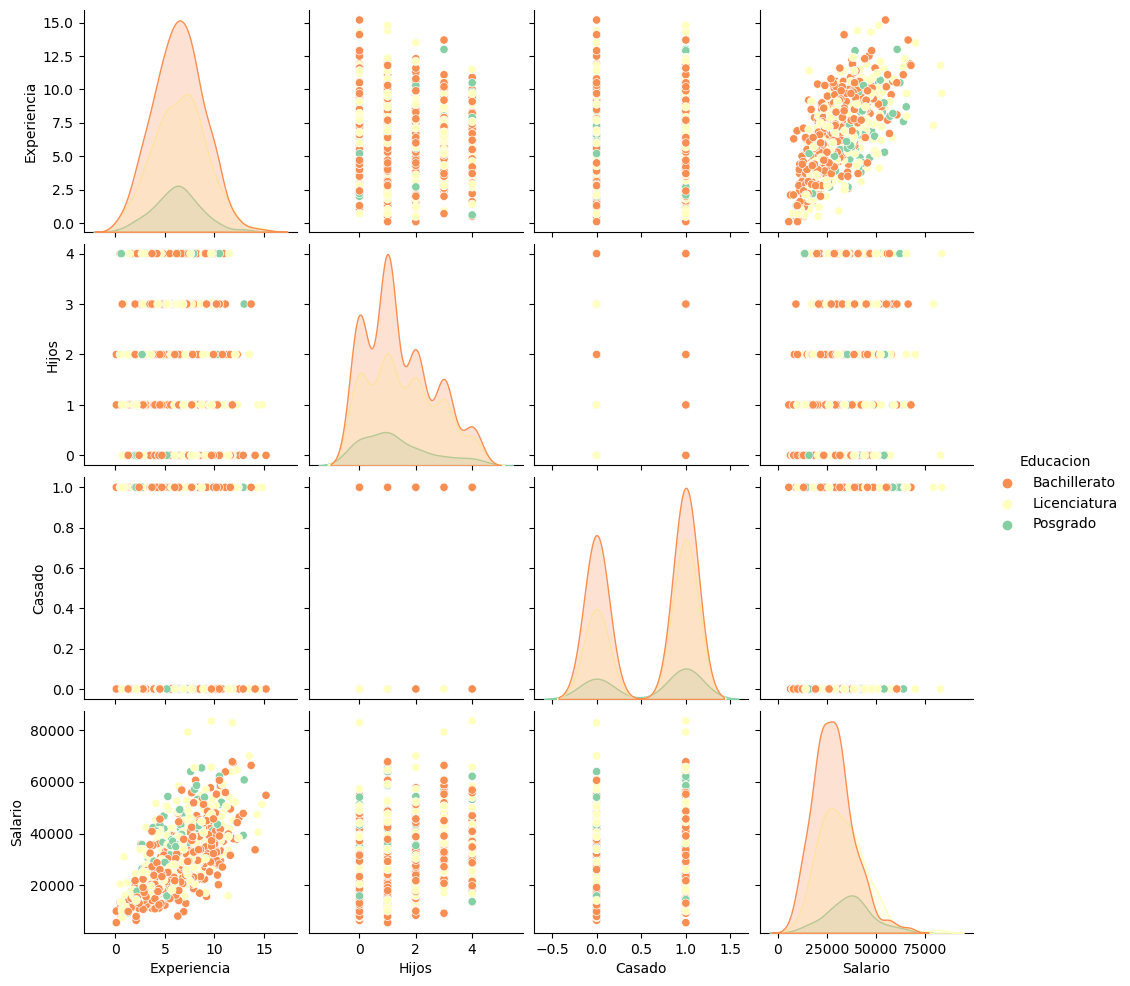

In [27]:
#Analiza multiples relaciones entre variables numericas
pairplot(df_rrhh_1, hue='Educacion', palette='Spectral', diag_kind='kde')

<div class="alert alert-info" role="alert">
    
Matriz de gráficos de dispersión mostrando histogramas y correlaciones entre variables

Se observa lo siguiente:
    
- Los histogramas mostrados en la diagonal muestran la distribución de cada variable, ninguna de las variables de la diagonal tiene un comportamiento de distribución normal.
- Se aprecia una relación entre la "variable objetivo Salario" y el resto de las variables.
- Existe una buena relación lineal entre experiencia y el salario.


### Gráficos de linea

                  Salario
Experiencia              
0.1           7860.000000
0.5          15106.666667
0.6          11953.333333
0.7           9500.000000
0.8           9140.000000
...                   ...
14.1         33750.000000
14.3         47390.000000
14.4         40550.000000
14.8         51280.000000
15.2         54790.000000

[127 rows x 1 columns]


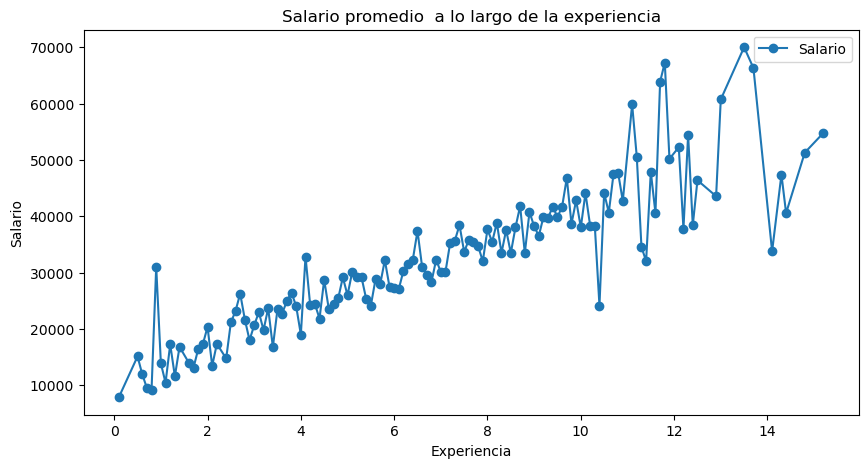

In [28]:
# Salario promedio  a lo largo de la experiencia
promedios_por_ano = df_rrhh_1.groupby("Experiencia")[["Salario"]].mean()
plt.figure(figsize=(10,5))
print(promedios_por_ano)
plt.plot(promedios_por_ano.index, promedios_por_ano["Salario"], marker='o', label="Salario") 
plt.title('Salario promedio  a lo largo de la experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

<div class="alert alert-info" role="alert">
Gráfica de línea de la variable Salario por la evolución de la experiencia:
    
- Este grafico de línea muestra la evolución promedio del "Salario" a lo largo del tiempo.


C:\Users\marce\AppData\Local\Temp\ipykernel_21384\3825826781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_rrhh_1.corr()


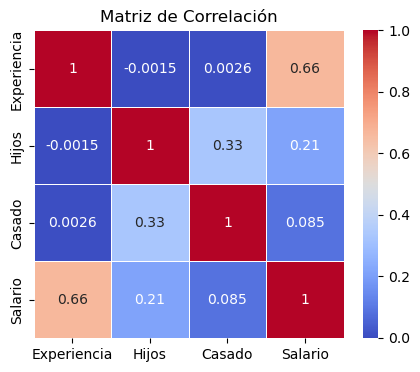

In [29]:
correlation_matrix = df_rrhh_1.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

<div class="alert alert-info" role="alert">
Matriz de correlación:

- En las variables numéricas, se puede apreciar que no hay correlaciones muy fuertes entre las variables salario e Hijos, casado e hijos.
       
- La variable salario y experiencia posee una fuerte relación 0.66

### Distribución de variables categóricas 

In [30]:
# Variables categóricas del tipo object("O")
df_rrhh_1.describe(include="O").T

,count,unique,top,freq
Posicion,1000,3,Analista,790
Educacion,1000,3,Bachillerato,531


<div class="alert alert-info" role="alert">
Resumen de variables categóricas:
    
- En esta tabla se muestra un resumen de conteo, valores únicos y frecuencia de las variables categóricas.   
- En la tabla indica que no hay valores faltantes para las variables categóricas.
- La variable posición indica que existen 3 valores únicos, el que más se repite  es el analista 790.   
    

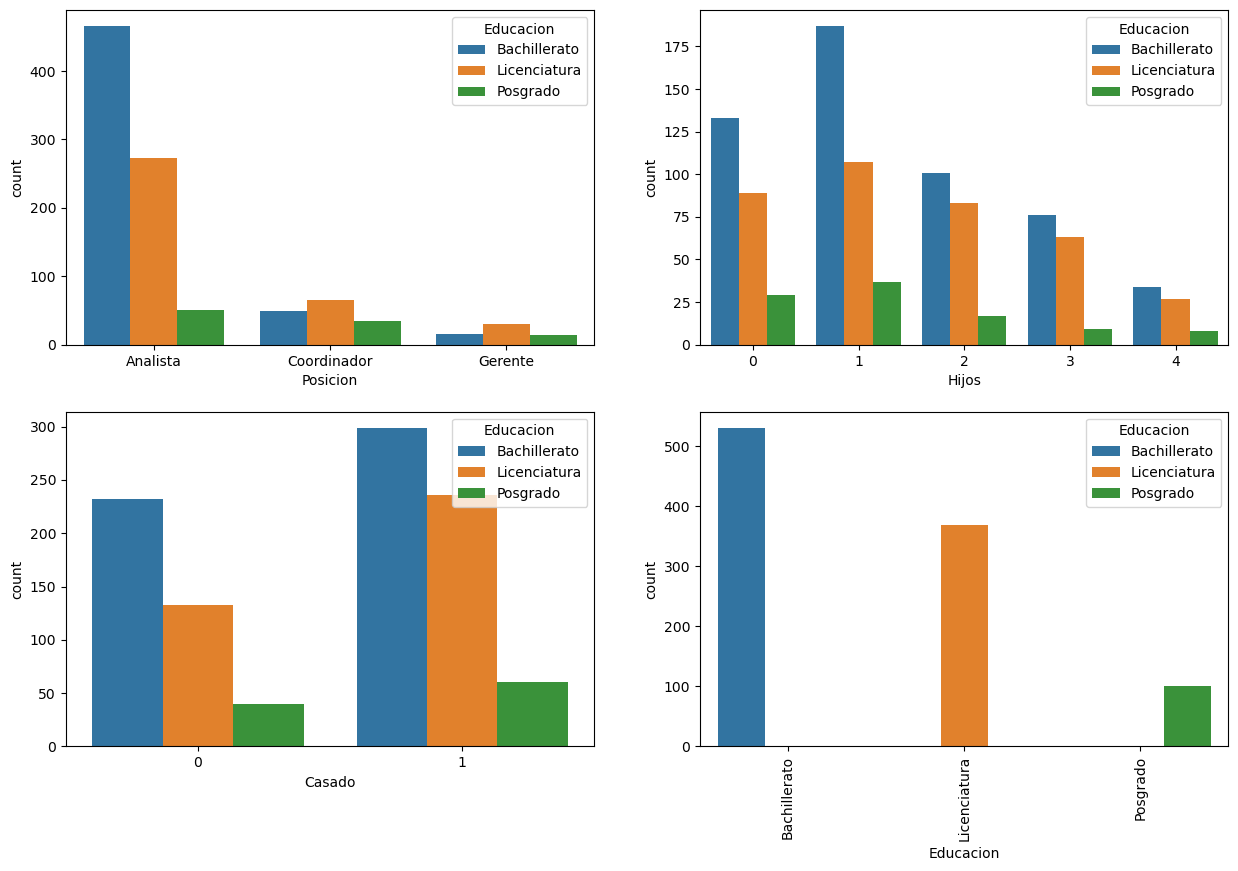

In [31]:
# Visualización de variables categoricas 
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='Posicion', data=df_rrhh_1, hue='Educacion')

plt.subplot(4, 2, 2)
sns.countplot(x='Hijos', data=df_rrhh_1, hue='Educacion')

plt.subplot(4, 2, 3)
sns.countplot(x='Casado', data=df_rrhh_1, hue='Educacion')

plt.subplot(4, 2, 4)
g =sns.countplot(x='Educacion', data=df_rrhh_1, hue='Educacion')

g.set_xticklabels(g.get_xticklabels(), rotation=90);

<div class="alert alert-info" role="alert">
Distribución de variables categóricas con otras de interés del conjunto de datos:
 
   - La mayoría de los postulantes con educación son con posición de analista.
   - La mayoría de los postulantes con educación  son con un hijo.
   - La mayoría de los postulantes con educación  son casado.
   - La mayoría de los postulantes con educación  son de bachillerato.

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Ingeniería de características</h1>
  <p></p>
</div>

In [32]:
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


### Revisión y eliminación de outliers

In [33]:
# Revisión y eliminación de outliers
continuas = df_rrhh_1.select_dtypes(include=["float"])

X = continuas.values
k = 5

nbrs = NearestNeighbors(n_neighbors=k+1).fit(X) # Calcular la distancia euclidiana
distances, indices = nbrs.kneighbors(X)

avg_distances = np.mean(distances[:, 1:], axis=1) # Distancia media entre cada observación y sus k vecinos más cercanos

threshold = np.percentile(avg_distances, 95) # Umbral para la distancia media

outliers = np.where(avg_distances > threshold)[0] # Identificar los outliers

df_rrhh_1 = df_rrhh_1.drop(df_rrhh_1.index[outliers]) # eliminar los outliers del DataFrame original

In [34]:
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    int64  
 3   Casado       952 non-null    int64  
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 52.1+ KB


### Grafica después de eliminar datos atípicos 

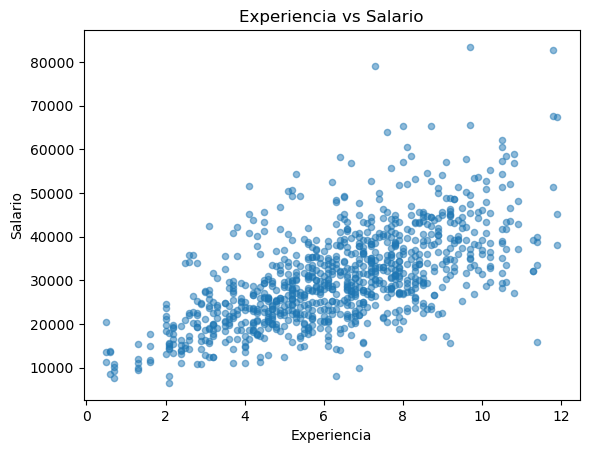

In [35]:
# Gráfica de dispersión, relación Experiencia Vs. Salario
datos = pd.concat([df_rrhh_1['Salario'], df_rrhh_1['Experiencia']], axis=1)
datos.plot.scatter(x='Experiencia', y='Salario', alpha = 0.5,title='Experiencia vs Salario');

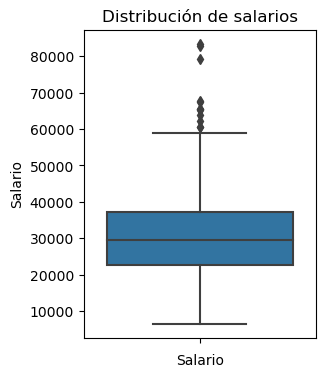

In [36]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df_rrhh_1["Salario"])

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Salario')
plt.show()

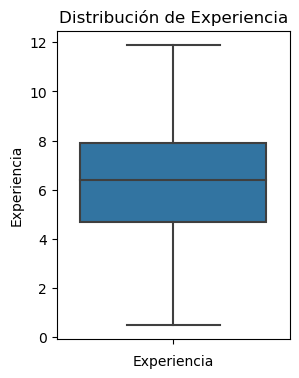

In [37]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df_rrhh_1["Experiencia"])

plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Experiencia')
plt.show()

Text(0.5, 1.0, 'Posicion por salario')

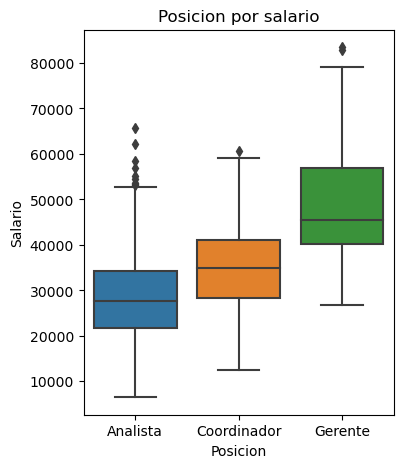

In [38]:
# Relación con las variables categóricas y la variable objetivo
data = pd.concat([df_rrhh_1['Salario'], df_rrhh_1['Posicion']], axis=1)
f, ax = plt.subplots(figsize=(4, 5))
fig = sns.boxplot(x='Posicion', y="Salario", data=data)

plt.title('Posicion por salario')

### Transformaciones  

In [39]:
# Convertir Variables Int a Float.
int_cols = df_rrhh_1.select_dtypes(include=['int64']).columns
df_rrhh_1[int_cols] = df_rrhh_1[int_cols].astype(float)

In [40]:
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    float64
 3   Casado       952 non-null    float64
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    float64
dtypes: float64(4), object(2)
memory usage: 52.1+ KB


In [41]:
# Dummies a variables categóricas.
df_rrhh_1 = pd.concat([df_rrhh_1, pd.get_dummies(df_rrhh_1[['Posicion', 'Educacion']], drop_first=False)], axis=1).drop(['Posicion', 'Educacion'], axis=1)

In [42]:
df_rrhh_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiencia             952 non-null    float64
 1   Hijos                   952 non-null    float64
 2   Casado                  952 non-null    float64
 3   Salario                 952 non-null    float64
 4   Posicion_Analista       952 non-null    uint8  
 5   Posicion_Coordinador    952 non-null    uint8  
 6   Posicion_Gerente        952 non-null    uint8  
 7   Educacion_Bachillerato  952 non-null    uint8  
 8   Educacion_Licenciatura  952 non-null    uint8  
 9   Educacion_Posgrado      952 non-null    uint8  
dtypes: float64(4), uint8(6)
memory usage: 42.8 KB


In [43]:
df_rrhh_1.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,1,0,0,0,1,0
3,5.2,2.0,1.0,29960.0,1,0,0,0,1,0
4,7.2,2.0,1.0,34710.0,0,1,0,0,1,0
5,7.2,2.0,1.0,32210.0,1,0,0,1,0,0


In [44]:
df_rrhh_1.shape

(952, 10)


<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Modelado de datos</h1>
  <p></p>
</div>

### ¿Predecir el Salario de cada postulante en función de los siguientes predictores?  

In [45]:
# Define el conjunto de variables dependiente e independientes

X = df_rrhh_1[['Experiencia', 'Hijos', 'Casado', 'Posicion_Analista',
              'Posicion_Coordinador', 'Posicion_Gerente', 'Educacion_Bachillerato',
              'Educacion_Licenciatura', 'Educacion_Posgrado']]# Variable independiente (input), predictor
y = df_rrhh_1['Salario']# Variable dependiente (Output), predecir

In [46]:
# tamaño de las variables dependiente e independientes
y.shape, X.shape

((952,), (952, 9))

### Modelo Regresión lineal 

In [47]:
# Se divide el conjunto de datos en dos "conjunto de entrenamiento" y en "conjunto de testing".
X_train, X_test, y_train, y_test = train_test_split(
                                        X,# Variable input, predictor
                                        y.values.reshape(-1,1),# Variable respuesta (output)
                                        train_size   = 0.8,# Conjunto de entrenamiento 80%
                                        random_state = 42,# Semilla aleatoria
                                        shuffle      = True
                                    )

<div class="alert alert-info" role="alert">
Conjunto de datos se dividen en dos:
    
- Los **conjuntos de entrenamiento** sirven para que Python «entrene» los datos,para nuestro caso 80% de entrenamiento
    
- El **conjunto de testing** es para evaluar que tan preciso es nuestro modelo, para nuestro caso 20% de testing. 


In [48]:
# Estandarizar las variables independientes X
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [49]:
# Crear objeto de modelo de regresión lineal (OLS)
modelo = LinearRegression()

In [50]:
# Entrenar modelo con el conjunto de entrenamiento
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [51]:
# Se crea un dataframe llamado df_coeficientes y estará constituido de dos columnas: predictor y coef.
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

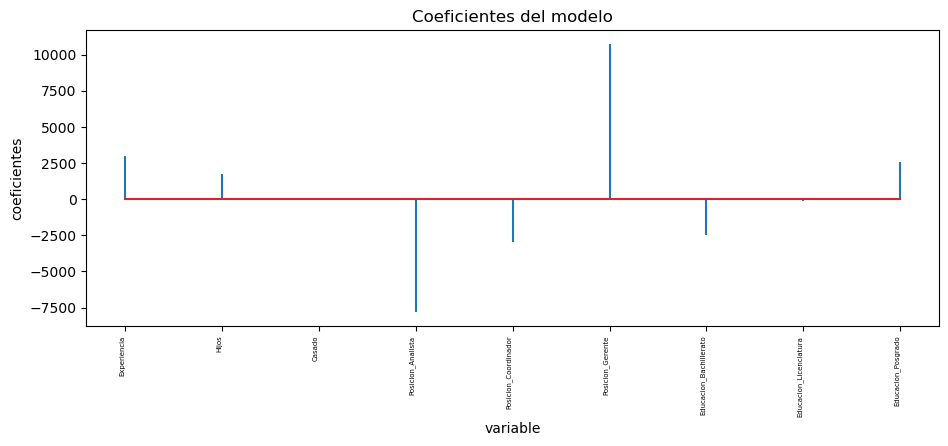

In [52]:
# Se crea una gráfica, que señala cada uno de los coeficientes para cada variable.
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [53]:
# Imprimir los coeficientes del modelo
df_coeficientes

,predictor,coef
0,Experiencia,2959.591673
1,Hijos,1715.482536
2,Casado,-19.869937
3,Posicion_Analista,-7831.130235
4,Posicion_Coordinador,-2931.156932
5,Posicion_Gerente,10762.287167
6,Educacion_Bachillerato,-2465.477817
7,Educacion_Licenciatura,-139.722714
8,Educacion_Posgrado,2605.200531


In [54]:
# Este es el valor donde corta el eje Y (en X=0)
modelo.intercept_

array([16352.36118404])

<div class="alert alert-info" role="alert">
   La fórmula de regresión lineal múltiple es:
$$
\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n$$


Salario = 16352.36118404 + 2956.319595 Experiencia + 1717.266785 Hijos +  b_n x_n
 

In [55]:
# Se crea variable predicciones para la variable dependiente "Salario", aqui se correr el modelo para el "conjunto de testing".
predicciones = modelo.predict(X_test)

In [56]:
# Primeros nueve valores predichos con nuestro modelo entrenado.
predicciones = predicciones.flatten()
predicciones[:5]

array([22489.05162838, 31090.22171254, 19803.37082393, 13986.37818183,
       40778.24753352])

In [57]:
# comparativo cinco primeros valores reales contra los cinco primeros valores predichos de la variable objetivo "Salario".
comp = pd.DataFrame({'Real': y_test.flatten(),
                     'Predicción': predicciones})
comp.head(5)

,Real,Predicción
0,28450.0,22489.051628
1,34840.0,31090.221713
2,20220.0,19803.370824
3,8020.0,13986.378182
4,37020.0,40778.247534


In [58]:
# Métricas de Evaluación del modelo de Test
mse = mean_squared_error(y_test, predicciones)
rmse_ols = mean_squared_error(y_test, predicciones, squared=False)
r2 = r2_score(y_test, predicciones)

print(f'MSE: {mse}')
print(f'RMSE_ols: {rmse_ols}')
print(f'R2 Score: {r2}')

MSE: 42176853.11963832
RMSE_ols: 6494.370879433844
R2 Score: 0.7033381136721748


<div class="alert alert-info" role="alert">

Las métricas de evaluación del modelo proporcionan información sobre su rendimiento:
 
   -  MSE(Error cuadrático medio): el MSE es 42,176,853, lo que indica que, en promedio, el error cuadrado de las      predicciones es de alrededor de 42,176,853 pesos mexicanos cuadrados.
    
    
   -  RMSE (Raíz del error cuadrático medio): el RMSE es 6494.37 pesos mexicanos. Esto significa que, en promedio, las     predicciones del modelo están desviadas por alrededor de 6494.37 pesos mexicanos.
    
    
   -  R2 (Coeficiente de Determinación) : R2 mide qué tan bien las variables independientes explican la variabilidad de la variable dependiente. Un R2 de 0.70 significa que el 70% de la variabilidad de la variable dependiente está explicada por las variables independientes en el modelo. Esto sugiere que el modelo tiene un buen ajuste para los datos y puede hacer predicciones con un nivel razonable de precisión, explicando un porcentaje significativo de la variabilidad observada en la variable objetivo.
 
    
  - Un R2 de 1 indica que el modelo se ajusta perfectamente a los datos.
  - Un R2 de 0 indica que el modelo no explica la variabilidad de los datos alrededor de la media.
</div> 

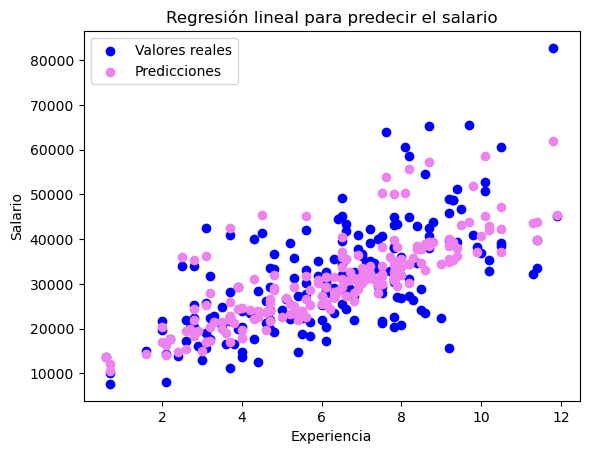

In [59]:
plt.scatter(X_test['Experiencia'], y_test, color='blue', label='Valores reales')
plt.scatter(X_test['Experiencia'], predicciones, color='violet', label='Predicciones')
plt.plot(X_test['Experiencia'], predicciones, color='violet', linewidth=0)
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.title('Regresión lineal para predecir el salario')
plt.legend(loc='upper left')
plt.show()


### Se prueba modelo con un nuevo postulante para predecir su salario

In [60]:
df_rrhh_1.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Salario', 'Posicion_Analista',
       'Posicion_Coordinador', 'Posicion_Gerente', 'Educacion_Bachillerato',
       'Educacion_Licenciatura', 'Educacion_Posgrado'],
      dtype='object')

In [61]:
media_X = np.mean(X)
X = X - media_X
std_X = np.std(X)
X = X / std_X

C:\Users\marce\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [62]:
# Características del nuevo postulante
pregunta = pd.DataFrame({
    'Experiencia': [5],
    'Hijos': [1],
    'Casado': [0],
    'Posicion_Analista': [0],
    'Posicion_Coordinador': [1],
    'Posicion_Gerente': [0],
    'Educacion_Bachillerato': [0],
    'Educacion_Licenciatura': [1],
    'Educacion_Posgrado': [0]    
})

In [63]:
X.head()

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-2.519020,2.095034,0.827621,0.518973,-0.425607,-0.25,0.938841,-0.760771,-0.336824
1,-0.317655,0.446028,-1.208283,0.518973,-0.425607,-0.25,-1.065143,1.314456,-0.336824
3,-0.490311,0.446028,0.827621,0.518973,-0.425607,-0.25,-1.065143,1.314456,-0.336824
4,0.372970,0.446028,0.827621,-1.926881,2.349585,-0.25,-1.065143,1.314456,-0.336824
5,0.372970,0.446028,0.827621,0.518973,-0.425607,-0.25,0.938841,-0.760771,-0.336824


In [64]:
#Previamente ya calculamos media_X y std_X
pregunta_escalada = (pregunta - media_X) / std_X
pregunta_escalada

,Experiencia,Hijos,Casado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-0.576639,-0.378474,-1.208283,-1.926881,2.349585,-0.25,-1.065143,1.314456,-0.336824


In [65]:
modelo.predict(pregunta_escalada)

array([[21097.50579545]])

<div class="alert alert-info" role="alert">
Se predice que el salario de un postulante es 21097.50579545 pesos Mexicano.

## Segunda parte modelo de clasificación

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.


#### Diccionario de datos:
 
  
  | Variable      | Tipo          | Clasificación | Descripción                                               |
|---------------|---------------|----------------|-----------------------------------------------------------|
| Experiencia   | Numérica       | Continuo              | Años de experiencia en el área.                            |
| Posición      | Categórica     | Nominal        | Posición que busca el postulante: Analista, Coordinador, Gerente. |
| Hijos         | Categórica     | Ordinal        | Número de hijos que tiene el postulante.                  |
| Casado        | Categórica     | Nominal        | Estado civil del postulante: 0 (No casado), 1 (Casado).    |
| Educación     | Categórica     | Ordinal        | Grado máximo de estudios concluido: Bachillerato, Licenciatura, Posgrado. |
| Salario       | Numérica       | Continuo        | Cantidad en pesos mexicanos que el postulante solicita como salario. |
|Contratado   | Categórica       | Nominal         | Postulante fue contratado: 0 (No fue Contratado), 1 (Contratado). 


<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Integracción y limpieza</h1>
  <p></p>
</div>

### Objetivo

Integrar datos para su posterior análisis.

In [66]:
# Generamos una lista de todas las columnas del conjunto de datos
list(df_rrhh_2.columns)

['Experiencia',
 'Posicion',
 'Hijos',
 'Casado',
 'Educacion',
 'Salario',
 'Contratado']

In [67]:
df_rrhh_2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [68]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [69]:
# Tipo de datos detectados por Pandas
df_rrhh_2.dtypes

Experiencia    float64
Posicion        object
Hijos            int64
Casado           int64
Educacion       object
Salario          int64
Contratado       int64
dtype: object

### Se revisan errores e inconsistencias en los datos


In [70]:
# Mostrar los datos únicos de cada variable 
for column in df_rrhh_2:
    print("-"*80)
    print(column)
    print("Valores únicos: ",df_rrhh_2[column].unique())
    print("-"*80)

--------------------------------------------------------------------------------
Experiencia
Valores únicos:  [ 0.5  5.6 11.7  5.2  7.2  1.3  8.1  6.2  9.8 10.5  6.4  3.7  8.   9.
  1.7 12.2  7.   5.9  1.6  9.7  5.   6.6  9.6  7.8 11.9  6.3  4.5  4.9
  8.4  8.8  9.1  7.5  5.8  9.3  5.5  3.9  6.9  2.2  4.2  9.9  5.4 10.1
  0.9  9.2  8.2  8.5  7.4  6.1  7.7  2.8  3.2  5.3  0.8 11.5  3.   7.1
  2.1  7.6  8.6  6.5 10.9  4.8  4.3 13.  10.2  6.8  5.7  4.4  7.9 10.6
  8.7  3.1  8.3  4.6  6.  10.8  2.4 15.2  2.6  1.4  4.1  3.3  2.   3.5
  0.6  6.7  4.7  1.   7.3  8.9  9.5  1.2 12.9  5.1  3.8 10.4  3.6 13.5
 10.7  9.4 11.3 11.1  2.5  0.7 11.8  2.7  3.4  1.8 10.   4.  12.5 11.4
  0.1 14.4 14.3 11.6  1.9 12.4 12.3 10.3  2.9 14.8  1.1 11.2 14.1 13.7
 12.1]
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Posicion
Valores únicos:  ['Analista' 'Coordinador' 'Gerente']
--------------------

Se revisan las  variables numéricas  `Experiencia` y `Salario` si contiene valores no numéricos

In [71]:
# contar las repeticiones del valor 'FALSO'
display(df_rrhh_2[df_rrhh_2['Experiencia']=='FALSO']['Experiencia'].count())
df_rrhh_2['Experiencia'] = to_numeric(df_rrhh_2['Experiencia'],errors='coerce')

0

In [72]:
# contar las repeticiones   del valor 'FALSO'
display(df_rrhh_2[df_rrhh_2['Salario']=='FALSO']['Salario'].count())
df_rrhh_2['Salario'] = to_numeric(df_rrhh_2['Salario'],errors='coerce')

0

In [73]:
# Se verifica dato nulos o faltantes
df_rrhh_2.isnull().sum()

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
Contratado     0
dtype: int64

In [74]:
# Se determina los valores nulos como porcentaje
df_rrhh_2.isna().sum()/len(df_rrhh_2) *100

Experiencia    0.0
Posicion       0.0
Hijos          0.0
Casado         0.0
Educacion      0.0
Salario        0.0
Contratado     0.0
dtype: float64

In [75]:
#  número de registros duplicados, no hay registros duplicado
df_rrhh_2.duplicated().sum()

0

In [76]:
print(f"porcentaje de completitud: {df_rrhh_2.count().sum() / df_rrhh_2.size * 100:.2f}%")

porcentaje de completitud: 100.00%


<div class="alert alert-info" role="alert">
<ul>
<li>porcentaje de valores faltantes:

- Menos de 1%: Trivial (no relevante)
- 1-5%: Manejable
- 5-15%: Manejable mediante métodos sofisticados
- Más de 15%: Crítico, con impacto severo en cualquier tipo de interpretación
 
        
</div>

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Exploración de datos</h1>
  <p></p>
</div>

### Objetivo

Comprender el contenido de los datos y responder las preguntas de negocio planteadas

In [77]:
# Estadisticas variables numericas 
df_rrhh_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiencia,1000.0,6.4162,2.577612,0.1,4.6,6.4,8.1,15.2
Hijos,1000.0,1.4530,1.208823,0.0,0.0,1.0,2.0,4.0
Casado,1000.0,0.5950,0.491138,0.0,0.0,1.0,1.0,1.0
Salario,1000.0,30787.0600,11520.200049,5630.0,22557.5,29470.0,37922.5,83470.0
Contratado,1000.0,0.5180,0.499926,0.0,0.0,1.0,1.0,1.0


<div class="alert alert-info" role="alert">
Resumen de la distribución y la variabilidad de las variables en el conjunto de datos:
 
   - No hay valores faltantes para las variables numéricas.
   - También podemos observar que alrededor del 51.8% de las observaciones están los postulantes contratados.
   - El salario promedio es de aproximadamente 30787. 

<function matplotlib.pyplot.show(close=None, block=None)>

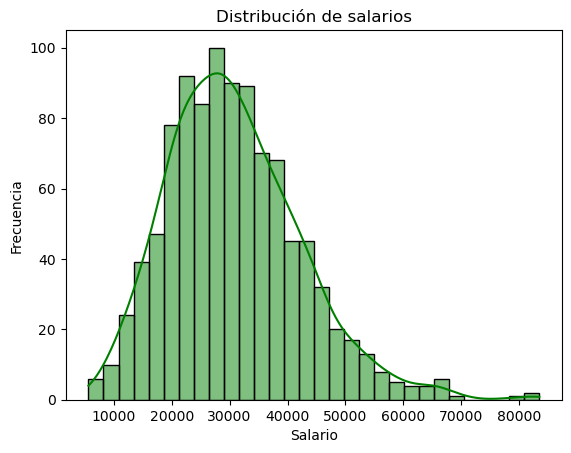

In [78]:
# Distribución de la variable salario
sns.histplot(data=df_rrhh_2, x='Salario', bins=30, kde=True, color='green')

plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable Salario:
 
   - Se observa que hay valores extremos en lada derecho de la cola, se utilizo el bins 50 para representar claramente la distribución.
  

Text(0.5, 1.0, 'Postulante contratado (1) y no contratado (0) por salario')

<Figure size 400x500 with 0 Axes>

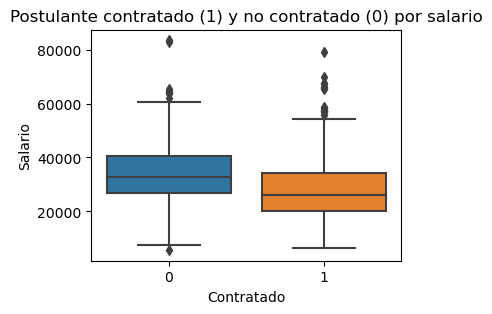

In [79]:
# Relación con variable categórica y la variable objetivo Contratado
plt.figure(figsize=(4, 5))
data = pd.concat([df_rrhh_2['Contratado'], df_rrhh_2['Salario']], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x='Contratado', y="Salario", data=data)

plt.title('Postulante contratado (1) y no contratado (0) por salario')

<div class="alert alert-info" role="alert">
Box Plots para comprender las distribuciones del Salario por Contratado que es la variable objetivo:
 
   - Este gráfico indica la presencia de valores extremos más claramente que el histograma. Esto se puede atribuir a la disparidad de salarios con la variable contratado. Parte de esto puede ser impulsado por el hecho de que estamos viendo postulantes contratados con diferentes niveles de educación. 

Text(0.5, 1.0, 'Educacion por salario')

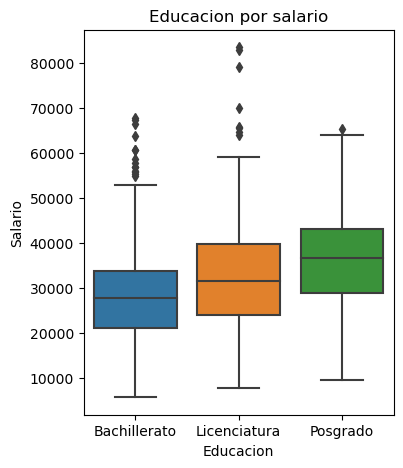

In [80]:
# Relación con las variables categóricas y la variable objetivo salario
data = pd.concat([df_rrhh_2['Salario'], df_rrhh_2['Educacion']], axis=1)
f, ax = plt.subplots(figsize=(4, 5))
fig = sns.boxplot(x='Educacion', y="Salario", data=data)

plt.title('Educacion por salario')

<div class="alert alert-info" role="alert">
Box Plots para comprender la distribución del Salario por educación:
 
   - Podemos ver que no hay diferencias sustanciales entre los salario medios de los distintos niveles de educación. Pero los postulantes con licenciatura tienen salarios muy altos, que paresen ser los valores atípicos.

<function matplotlib.pyplot.show(close=None, block=None)>

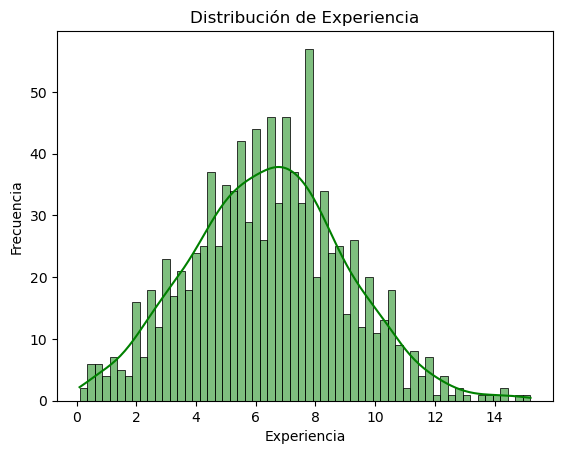

In [81]:
sns.histplot(data=df_rrhh_2, x='Experiencia', bins=60, kde=True, color='green')

plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Frecuencia')

plt.show

<div class="alert alert-info" role="alert">
Distribución de la variable experiencia:
 
   - Se observa que hay valores extremos en lada derecho de la cola, se utilizo el bins 60 para representar claramente la distribución.
   - Hay un pico en el rango de experiencia de 4 a 8 años, lo que indica que hay un gran número de postulantes en ese rango de experiencia.
   - La desviación estándar de la experiencia es de alrededor de 2.5 años, lo que indica que la mayoría de los postulantes están dentro de un rango de +/- 2.5 años de la media.

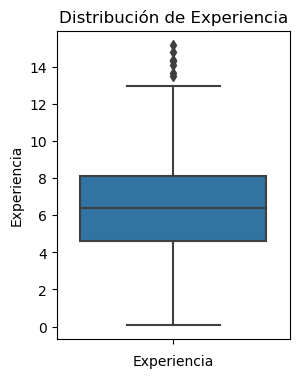

In [82]:
plt.figure(figsize=(3, 4))
sns.boxplot(y=df_rrhh_2["Experiencia"])

plt.title('Distribución de Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Experiencia')
plt.show()

<div class="alert alert-info" role="alert">
Box Plots para comprender las distribuciones de la experiencia:
 
   - Este gráfico indica la presencia de valores extremos más claramente que el histograma. Esto se puede atribuir a la disparidad de la experiencia en los postulantes. Parte de esto puede ser impulsado por el hecho de que estamos viendo postulantes con distintos niveles de experincia.

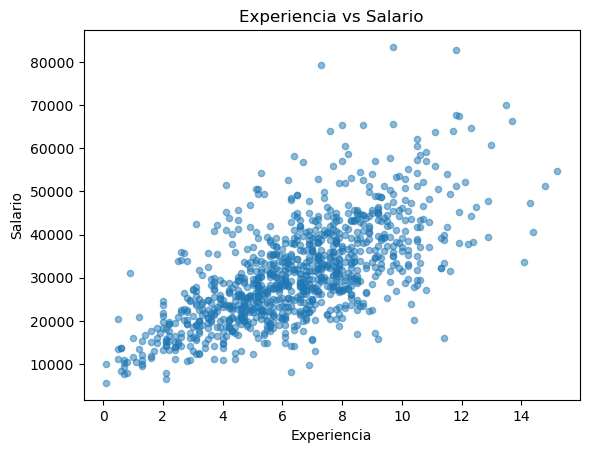

In [83]:
# Gráfica de dispersión, relación Experiencia Vs. Salario
datos = pd.concat([df_rrhh_2['Salario'], df_rrhh_2['Experiencia']], axis=1)
datos.plot.scatter(x='Experiencia', y='Salario', alpha = 0.5,title='Experiencia vs Salario');

<div class="alert alert-info" role="alert">
Gráfica de dispersión, relación Experiencia Vs. Salario:
 
   - Existe un buen patrón lineal positivo entre experiencia y el salario. Esto servirá como punto de partida para análisis más detallado o para validar hipótesis sobre la relación entre estas dos variables. 

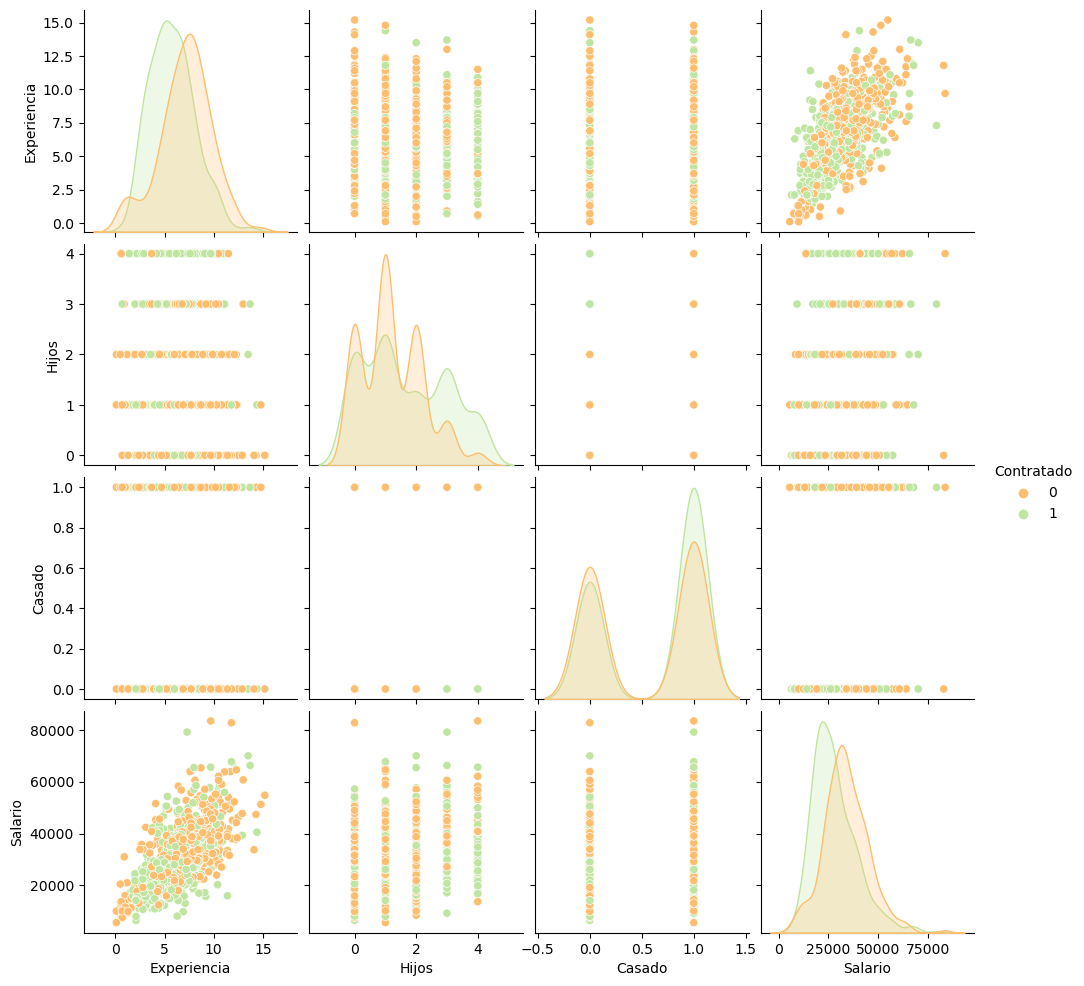

In [84]:
#Analiza multiples relaciones entre variables numericas
pairplot(df_rrhh_2, hue='Contratado', palette='Spectral', diag_kind='kde')

<div class="alert alert-info" role="alert">
    
Matriz de gráficos de dispersión mostrando histogramas y correlaciones entre variables y la variable objetivo.

Se observa lo siguiente:
    
- Los histogramas mostrados en la diagonal muestran la distribución de cada variable, ninguna de las variables de la diagonal tiene un comportamiento de distribución normal.
- Se aprecia una relación entre la variable Salario y el resto de las variables.
- Existe una buena relación lineal entre experiencia y el salario.


C:\Users\marce\AppData\Local\Temp\ipykernel_21384\3589879512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_rrhh_2.corr()


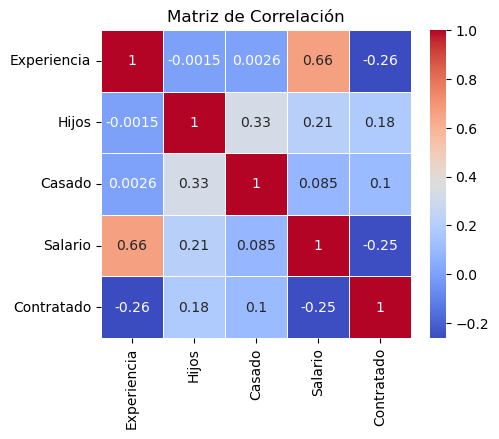

In [85]:
correlation_matrix = df_rrhh_2.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

<div class="alert alert-info" role="alert">
Matriz de correlación:

- En las variables numéricas, se puede apreciar que no hay correlaciones muy fuertes entre las variables contratado e Hijos, casado y salario.
       
- La variable salario y experiencia posee una fuerte relación 0.66.
    
- La variable casado, experiencia e hijos posee una débil relación. 

### Distribución de variables categóricas 

In [86]:
# Variables categóricas del tipo object("O")
df_rrhh_2.describe(include="O").T

,count,unique,top,freq
Posicion,1000,3,Analista,790
Educacion,1000,3,Bachillerato,531


<div class="alert alert-info" role="alert">
Resumen de variables categóricas:
    
- En esta tabla se muestra un resumen de conteo, valores únicos y frecuencia de las variables categóricas.   
- En la tabla indica que no hay valores faltantes para las variables categóricas.
- La variable posición indica que existen 3 valores únicos, el que más se repite  es el analista 790.  

### Variable objetivo "Contratado"

In [87]:
#verificar si el set de datos está balanceado
df_rrhh_2["Contratado"].value_counts(normalize=True)*100

1    51.8
0    48.2
Name: Contratado, dtype: float64

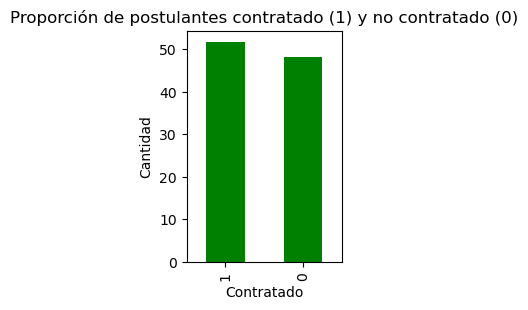

In [88]:
#Proporción de la variable objetivo "Contratado", postulantes contratado (1) y no contratado (0)
contratado_counts =df_rrhh_2['Contratado'].value_counts(normalize=True)*100
plt.figure(figsize=(2, 3))
contratado_counts.plot(kind='bar', color='green')
plt.title('Proporción de postulantes contratado (1) y no contratado (0)')
plt.xlabel('Contratado')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-info" role="alert">
Proporción de postulantes contratado (1) y no contratado (0)':
    
- En la variable Contratado que es la variable objetivo se refleja que el estado 1 (Contratado) es levemente mayor en proporción con el estado 0 (no contratado).


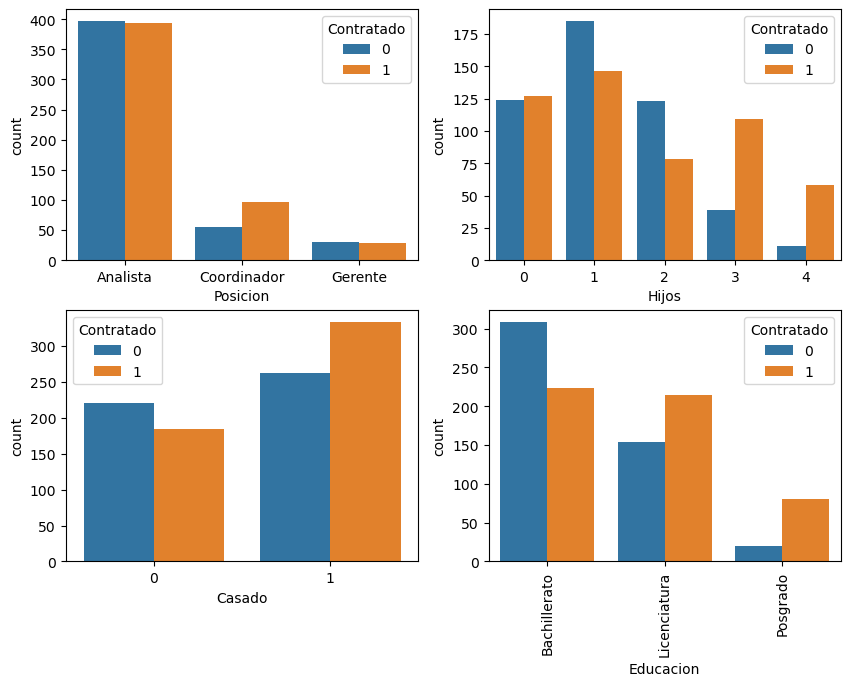

In [89]:
# Visualización de variables categoricas 
plt.figure(figsize=(10, 15))

plt.subplot(4, 2, 1)
sns.countplot(x='Posicion', data=df_rrhh_2, hue='Contratado')

plt.subplot(4, 2, 2)
sns.countplot(x='Hijos', data=df_rrhh_2, hue='Contratado')

plt.subplot(4, 2, 3)
sns.countplot(x='Casado', data=df_rrhh_2, hue='Contratado')

plt.subplot(4, 2, 4)
g =sns.countplot(x='Educacion', data=df_rrhh_2, hue='Contratado')

g.set_xticklabels(g.get_xticklabels(), rotation=90);

<div class="alert alert-info" role="alert">
Distribución de variables categóricas con la variable objetivo "Contratado":
 
   - La mayoría de los postulantes no contratados son con posición de analista.
   - La mayoría de los postulantes no contratados son con un hijo.
   - La mayoría de los postulantes contratado son casado.
   - La mayoría de los postulantes no contratado son de bachillerato.

<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Ingeniería de características</h1>
  <p></p>
</div>

In [90]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


### Revisión y eliminación de outliers

In [91]:
# Revisión y eliminación de outliers
continuas = df_rrhh_2.select_dtypes(include=["float"])

X = continuas.values
k = 5

nbrs = NearestNeighbors(n_neighbors=k+1).fit(X) # Calcular la distancia euclidiana
distances, indices = nbrs.kneighbors(X)

avg_distances = np.mean(distances[:, 1:], axis=1) # Distancia media entre cada observación y sus k vecinos más cercanos

threshold = np.percentile(avg_distances, 95) # Umbral para la distancia media

outliers = np.where(avg_distances > threshold)[0] # Identificar los outliers

df_rrhh_2 = df_rrhh_2.drop(df_rrhh_2.index[outliers]) # eliminar los outliers del DataFrame original

In [92]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    int64  
 3   Casado       952 non-null    int64  
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    int64  
 6   Contratado   952 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 59.5+ KB


### Grafica después de eliminar datos atípicos 

In [93]:
#verificar si el set de datos está balanceado
df_rrhh_2["Contratado"].value_counts(normalize=True)*100

1    52.941176
0    47.058824
Name: Contratado, dtype: float64

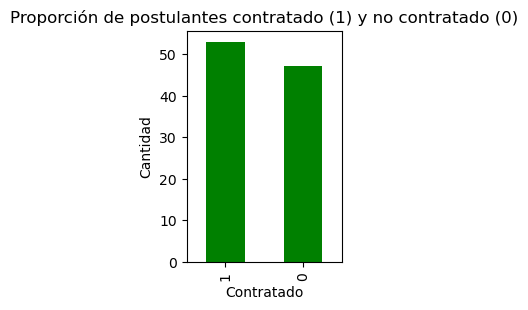

In [94]:
#Proporción de la variable objetivo "Contratado", postulantes contratado (1) y no contratado (0)
contratado_counts =df_rrhh_2['Contratado'].value_counts(normalize=True)*100
plt.figure(figsize=(2, 3))
contratado_counts.plot(kind='bar', color='green')
plt.title('Proporción de postulantes contratado (1) y no contratado (0)')
plt.xlabel('Contratado')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Postulante contratado (1) y no contratado (0) por salario')

<Figure size 400x300 with 0 Axes>

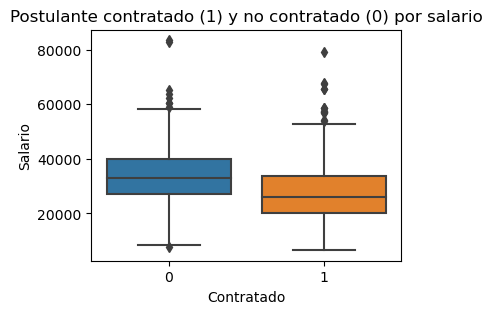

In [95]:
# Relación con variable categórica y la variable objetivo Contratado
plt.figure(figsize=(4, 3))
data = pd.concat([df_rrhh_2['Contratado'], df_rrhh_2['Salario']], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x='Contratado', y="Salario", data=data)

plt.title('Postulante contratado (1) y no contratado (0) por salario')

### Transformaciones  

In [96]:
# Convertir Variables Int a Float.
int_cols = df_rrhh_2.select_dtypes(include=['int64']).columns
df_rrhh_2[int_cols] = df_rrhh_2[int_cols].astype(float)

In [97]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  952 non-null    float64
 1   Posicion     952 non-null    object 
 2   Hijos        952 non-null    float64
 3   Casado       952 non-null    float64
 4   Educacion    952 non-null    object 
 5   Salario      952 non-null    float64
 6   Contratado   952 non-null    float64
dtypes: float64(5), object(2)
memory usage: 59.5+ KB


In [98]:
# Dummies a variables categóricas.
df_rrhh_2 = pd.concat([df_rrhh_2, pd.get_dummies(df_rrhh_2[['Posicion', 'Educacion']], drop_first=False)], axis=1).drop(['Posicion', 'Educacion'], axis=1)

In [99]:
df_rrhh_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiencia             952 non-null    float64
 1   Hijos                   952 non-null    float64
 2   Casado                  952 non-null    float64
 3   Salario                 952 non-null    float64
 4   Contratado              952 non-null    float64
 5   Posicion_Analista       952 non-null    uint8  
 6   Posicion_Coordinador    952 non-null    uint8  
 7   Posicion_Gerente        952 non-null    uint8  
 8   Educacion_Bachillerato  952 non-null    uint8  
 9   Educacion_Licenciatura  952 non-null    uint8  
 10  Educacion_Posgrado      952 non-null    uint8  
dtypes: float64(5), uint8(6)
memory usage: 50.2 KB


In [100]:
df_rrhh_2.head()

,Experiencia,Hijos,Casado,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4.0,1.0,13540.0,1.0,1,0,0,1,0,0
1,5.6,2.0,0.0,31240.0,0.0,1,0,0,0,1,0
3,5.2,2.0,1.0,29960.0,1.0,1,0,0,0,1,0
4,7.2,2.0,1.0,34710.0,1.0,0,1,0,0,1,0
5,7.2,2.0,1.0,32210.0,0.0,1,0,0,1,0,0


In [101]:
df_rrhh_2.shape

(952, 11)


<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Modelado de datos</h1>
  <p></p>
</div>

### ¿Predecir si un postulante será "Contratado" en función de los siguientes predictores? 

In [102]:
# Separar variables predictoras (X) de la variable objetivo (y)
X = df_rrhh_2[['Experiencia', 'Hijos', 'Casado', 'Salario','Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
       'Educacion_Bachillerato', 'Educacion_Licenciatura',
       'Educacion_Posgrado']]# Variable independiente (input), predictor
y = df_rrhh_2['Contratado'] #  Variable dependiente (Output), predecir

In [103]:
y.shape, X.shape

((952,), (952, 10))

### Modelo Regresión lógística 

In [104]:
# Se divide el conjunto de datos en dos "conjunto de entrenamiento" y en "conjunto de testing".
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

<div class="alert alert-info" role="alert">
Conjunto de datos se dividen en dos:
    
- Los **conjuntos de entrenamiento** sirven para que Python «entrene» los datos,para nuestro caso 80% de entrenamiento
    
- El **conjunto de testing** es para evaluar que tan preciso es nuestro modelo, para nuestro caso 20% de testing. 

In [105]:
# Estandarizar las variables independientes X
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [106]:
# Crear objeto de modelo de regresión logística
model = LogisticRegression()

In [107]:
# Entrenar modelo con el conjunto de entrenamiento
model.fit(X_train,y_train)

LogisticRegression()

In [108]:
# Predecir valores de contratado para el conjunto de pruebas
y_pred = model.predict(X_test)

In [109]:
# Crear matriz de confusión, aquí el primer argumentos ingresados fue la variable objetivo de prueba ($y$) y después la variable predecida ($\hat{y}$).
cm = confusion_matrix(y_test, y_pred,labels=[1,0])
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

In [110]:
cm

array([[62, 37],
       [27, 65]], dtype=int64)

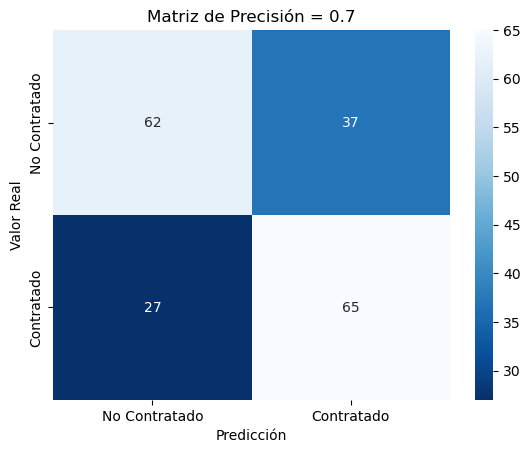

La precisión del modelo es: 0.7


In [111]:
# La gráfica muestra un comparativo entre los valores reales y los predecidos
sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='g',
            xticklabels=['No Contratado', 'Contratado'],
            yticklabels=['No Contratado', 'Contratado'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title(f'Matriz de Precisión = {accuracy:.1f}')
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La precisión del modelo es: {accuracy:.1f}')

<div class="alert alert-info" role="alert">
<ul>
<li>
  
En la matriz de confusión, los elementos diagonales representan las predicciones correctas, mientras que los elementos fuera de la diagonal representan las predicciones incorrectas. En particular:

- **Verdaderos positivos (TP)**: Predicciones correctas de la clase positiva.
- **Falsos positivos (FP)**: Predicciones incorrectas de la clase positiva.
- **Verdaderos negativos (TN)**: Predicciones correctas de la clase negativa.
- **Falsos negativos (FN)**: Predicciones incorrectas de la clase negativa.

Interpretacion de los resultados matriz de confusión:

- **65** son los verdaderos positivos (TP), es decir, el modelo predijo correctamente la clase positiva.
- **62** son los verdaderos negativos (TN), el modelo predijo correctamente la clase negativa.
- **27** son los falsos positivos (FP), el modelo predijo incorrectamente la clase positiva.
- **37** son los falsos negativos (FN), el modelo predijo incorrectamente la clase negativa.

    
Interpretacion de los resultados accuracy:    
    
    
La precisión del modelo (accuracy) es una métrica que indica la proporción de predicciones correctas realizadas por el modelo para todas las clases. En este caso, el modelo tiene una precisión de 0.70 o 70%.

Esto significa que el 70% de las predicciones realizadas por el modelo fueron correctas, independientemente de la clase a la que pertenecieran. Es una métrica general que muestra qué tan bueno es el modelo en términos de predicciones correctas en comparación con el total de predicciones realizadas.

        
</div>

In [112]:
data = pd.DataFrame({'Real': y_test, 'Prediccion': y_pred})
data.head(10)

,Real,Prediccion
210,0.0,1.0
441,0.0,0.0
732,1.0,1.0
791,1.0,1.0
532,1.0,1.0
659,1.0,1.0
869,1.0,0.0
557,0.0,1.0
974,0.0,1.0
184,1.0,1.0


In [113]:
#calculamos el accuracy en el conjunto de train
print('accuracy')
model.score(X_train_std, y_train )

accuracy


C:\Users\marce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6202365308804205

In [114]:
#calculamos el accuracy en el conjunto de test
print('accuracy')
model.score(X_test_std, y_test )

accuracy


C:\Users\marce\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5863874345549738

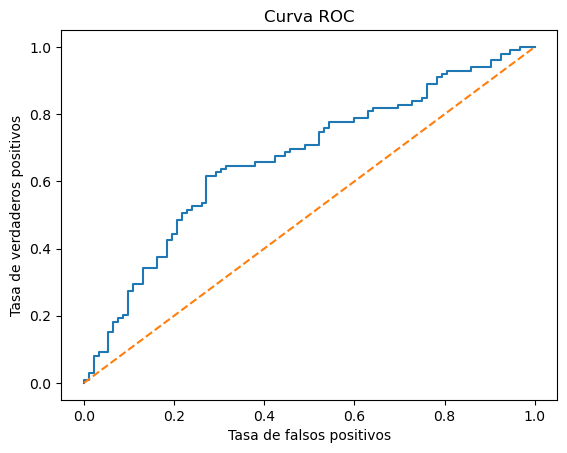

AUC: 0.6675450153711023


In [115]:
# Establecemos la probabilidad de predicción
y_proba = model.predict_proba(X_test)[:, 1]

# Construimos los valores de la curva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Construimos la gráfica
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

# Área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_proba)
print('AUC:', auc)

<div class="alert alert-info" role="alert">
<ul>
<li>Curva ROC:
     
- Linea azul modelo entrenado con Regresión Logistica: 
   La linea azul representa el modelo entrenado con regresión logistica, en la curva se aprecia que conforme disminuyen los falsos positivos, aumentan los aciertos de los verdaderos positivos.

    
La métrica de AUC (Área bajo la Curva ROC):    

Es una medida de la capacidad discriminativa de un modelo de clasificación binaria. El valor de AUC varía entre 0 y 1, donde:

- Un AUC de 0.5 indica que el modelo no tiene capacidad discriminativa (similar a una predicción aleatoria).
- Un AUC de 1.0 indica que el modelo tiene una capacidad discriminativa perfecta.

interpretación de resultado:

- Un AUC de 0.6675 sugiere que el modelo tiene cierta capacidad para discriminar entre las clases positiva y negativa, pero no es muy fuerte. En términos generales, un AUC superior a 0.5 indica algún grado de capacidad discriminativa, pero no necesariamente un rendimiento fuerte.
      
</div>

### Se prueba modelo con un nuevo postulante para predecir si será contratado

In [116]:
df_rrhh_2.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Salario', 'Contratado',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente',
       'Educacion_Bachillerato', 'Educacion_Licenciatura',
       'Educacion_Posgrado'],
      dtype='object')

In [117]:
medialr_X = np.mean(X)
X = X - medialr_X
std_X = np.std(X)
X = X / std_X

C:\Users\marce\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [118]:
X.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-2.519020,2.095034,0.827621,-1.553568,0.518973,-0.425607,-0.25,0.938841,-0.760771,-0.336824
1,-0.317655,0.446028,-1.208283,0.058101,0.518973,-0.425607,-0.25,-1.065143,1.314456,-0.336824
3,-0.490311,0.446028,0.827621,-0.058449,0.518973,-0.425607,-0.25,-1.065143,1.314456,-0.336824
4,0.372970,0.446028,0.827621,0.374061,-1.926881,2.349585,-0.25,-1.065143,1.314456,-0.336824
5,0.372970,0.446028,0.827621,0.146424,0.518973,-0.425607,-0.25,0.938841,-0.760771,-0.336824


In [119]:
# Características del nuevo postulante
pregunta_lr = data = pd.DataFrame({
    'Experiencia': [1],
    'Hijos': [4],
    'Casado': [1],
    'Salario': [1340],
    'Posicion_Analista': [0],
    'Posicion_Coordinador': [1],
    'Posicion_Gerente': [0],
    'Educacion_Bachillerato': [0],
    'Educacion_Licenciatura': [1],
    'Educacion_Posgrado': [0]    
})

In [120]:
#Previamente ya calculamos media_X y std_X
pregunta_escaladalr = (pregunta_lr - medialr_X) / std_X
pregunta_escaladalr

,Experiencia,Hijos,Casado,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente,Educacion_Bachillerato,Educacion_Licenciatura,Educacion_Posgrado
0,-2.3032,2.095034,0.827621,-2.664435,-1.926881,2.349585,-0.25,-1.065143,1.314456,-0.336824


In [121]:
model.predict(pregunta_escaladalr)

array([1.])

<div class="alert alert-info" role="alert">
Se predice que postulante contratado es 1 (Contratado)

### Modelo SVM (Máquina de Vectores de Soporte)

In [122]:
# Se divide el conjunto de datos en dos "conjunto de entrenamiento" y en "conjunto de testing".
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1, random_state=42) # Modelo SVM y ajuste los datos de entrenamiento.
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # conjunto de prueba y evaluamos la precisión del modelo.

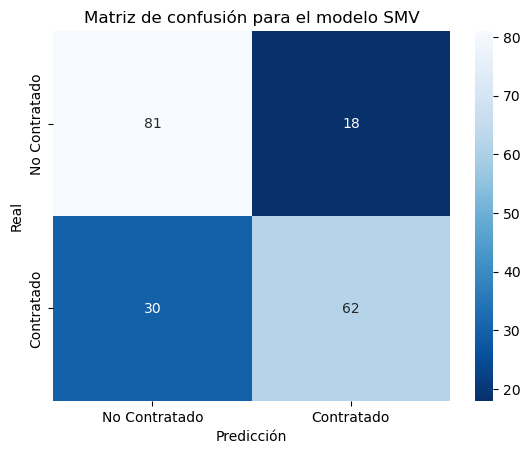

Accuracy: 0.7486910994764397


In [124]:
cm = confusion_matrix(y_test, y_pred,labels=[1,0]) # Matriz de confusión

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', xticklabels=['No Contratado', 'Contratado'],
            yticklabels=['No Contratado', 'Contratado'])
plt.title('Matriz de confusión para el modelo SMV')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)


<div class="alert alert-info" role="alert">
<ul>
<li>
  
Matriz de confusión para el modelo SMV (Máquina de Vectores de Soporte):

Interpretacion de los resultados matriz de confusión:

- **62** son los verdaderos positivos (TP), es decir, el modelo predijo correctamente la clase positiva.
- **81** son los verdaderos negativos (TN), el modelo predijo correctamente la clase negativa.
- **30** son los falsos positivos (FP), el modelo predijo incorrectamente la clase positiva.
- **18** son los falsos negativos (FN), el modelo predijo incorrectamente la clase negativa.

    
Interpretacion de los resultados accuracy  modelo SMV:    
    
    
La precisión del modelo (accuracy) es una métrica que indica la proporción de predicciones correctas realizadas por el modelo para todas las clases. En este caso, el modelo tiene una precisión de 0.74 o 74%.

Esto significa que el 74% de las predicciones realizadas por el modelo fueron correctas, independientemente de la clase a la que pertenecieran. Es una métrica general que muestra qué tan bueno es el modelo en términos de predicciones correctas en comparación con el total de predicciones realizadas.

        
</div>